In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
housedata = datasets.load_boston()

In [3]:
housedata

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df_features =housedata.feature_names

In [5]:
data= pd.DataFrame(housedata.data, columns=df_features)

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df_corr= data.corr()

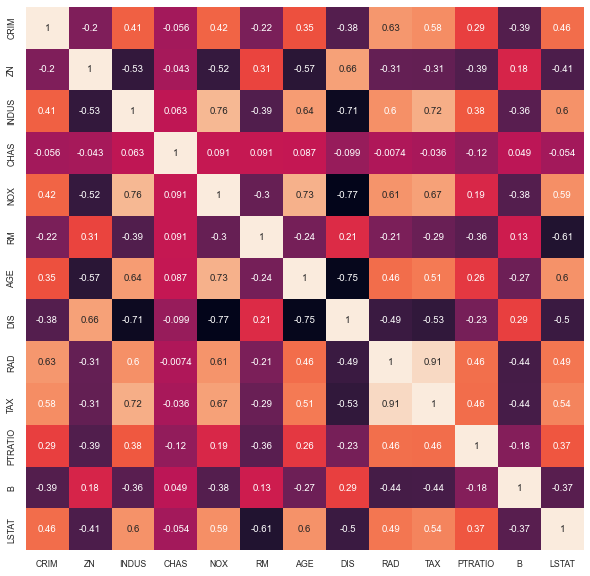

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot= True, cbar= False)
plt.show()

In [9]:
df= data[["LSTAT", "RM", "PTRATIO", "INDUS"]]

In [10]:
df

,LSTAT,RM,PTRATIO,INDUS
0,4.98,6.575,15.3,2.31
1,9.14,6.421,17.8,7.07
2,4.03,7.185,17.8,7.07
3,2.94,6.998,18.7,2.18
4,5.33,7.147,18.7,2.18
...,...,...,...,...
501,9.67,6.593,21.0,11.93
502,9.08,6.120,21.0,11.93
503,5.64,6.976,21.0,11.93
504,6.48,6.794,21.0,11.93


In [11]:
df_target= pd.DataFrame(housedata.target, columns=["target"])

In [12]:
df_target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_target,test_size=0.25,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1))  

회귀계수(기울기): [[-0.6  4.3 -1.1 -0. ]]
상수항(절편): [23.4]


In [18]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(379, 4) (127, 4)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 36.963, RMSE: 6.080
Variance score : 0.548


In [20]:
print("절편 값:", lr.intercept_) 
print("회귀계수:", np.round(lr.coef_,1))

절편 값: [23.35099285]
회귀계수: [[-0.6  4.3 -1.1 -0. ]]


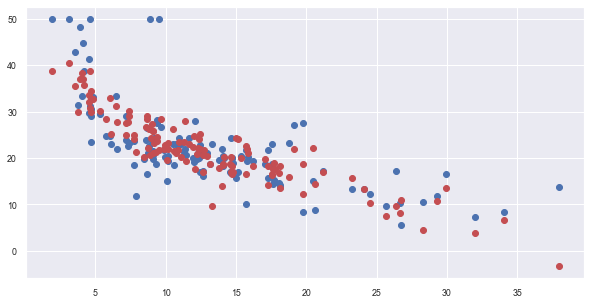

In [21]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.show() 

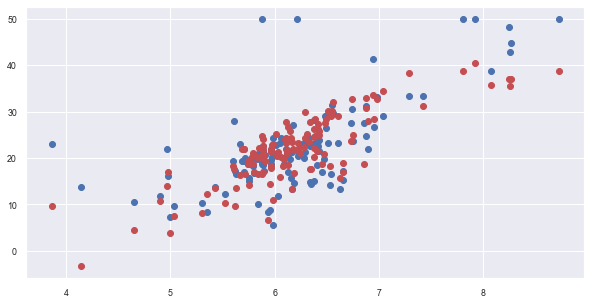

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['RM'], y_test, label='y_test')
plt.scatter(X_test['RM'], y_test_pred, c='r', label='y_pred')
plt.show() 

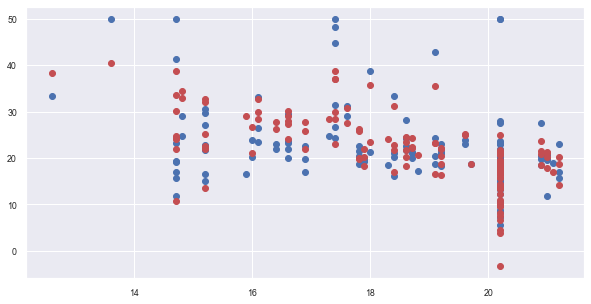

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['PTRATIO'], y_test, label='y_test')
plt.scatter(X_test['PTRATIO'], y_test_pred, c='r', label='y_pred')
plt.show() 

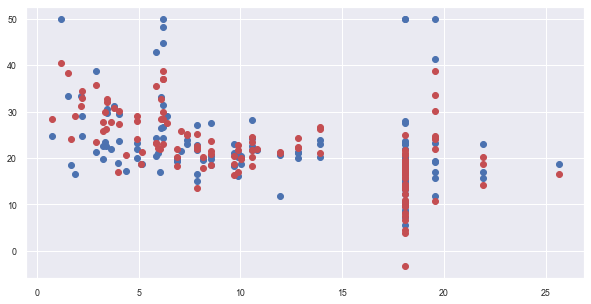

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['INDUS'], y_test, label='y_test')
plt.scatter(X_test['INDUS'], y_test_pred, c='r', label='y_pred')
plt.show() 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(df)
boston_scaled = scaler.transform(df) 

boston_scaled_df = pd.DataFrame(boston_scaled) 
print(boston_scaled_df)
print(f"평균\n{boston_scaled_df.mean()}")
print(f"분산\n{boston_scaled_df.var()}")

            0         1         2         3
0   -1.075562  0.413672 -1.459000 -1.287909
1   -0.492439  0.194274 -0.303094 -0.593381
2   -1.208727  1.282714 -0.303094 -0.593381
3   -1.361517  1.016303  0.113032 -1.306878
4   -1.026501  1.228577  0.113032 -1.306878
..        ...       ...       ...       ...
501 -0.418147  0.439316  1.176466  0.115738
502 -0.500850 -0.234548  1.176466  0.115738
503 -0.983048  0.984960  1.176466  0.115738
504 -0.865302  0.725672  1.176466  0.115738
505 -0.669058 -0.362767  1.176466  0.115738

[506 rows x 4 columns]
평균
0   -3.370163e-16
1   -1.145230e-14
2   -9.205636e-15
3   -2.682911e-15
dtype: float64
분산
0    1.00198
1    1.00198
2    1.00198
3    1.00198
dtype: float64


In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
train_scaled = scaler.transform(X_train)
test_scaled= scaler.transform(X_test)

In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge = Ridge()

In [31]:
ridge.fit(train_scaled, y_train)

Ridge()

In [32]:
print(ridge.score(train_scaled, y_train))

0.7170611974463728


In [33]:
print(ridge.score(test_scaled, y_test))

0.5475977132319283


In [34]:
import matplotlib.pyplot as plt

In [35]:
train_score=[]
test_score= []

In [36]:
alpha_list= [0.001, 0.01, 0.1, 1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

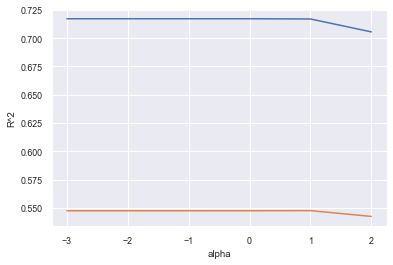

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [41]:
ridge=Ridge(alpha=10)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.7168624131650256
0.5476735661933383


In [42]:
from sklearn.linear_model import Lasso

In [44]:
lasso=Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.6979129199926404


In [45]:
print(lasso.score(test_scaled, y_test))

0.5662417764576474


In [49]:
train_score2= []
test_score2= []
alpha_list= [0.001, 0.01, 0.1, 1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, y_train)
    train_score2.append(lasso.score(train_scaled, y_train))
    test_score2.append(lasso.score(test_scaled, y_test))

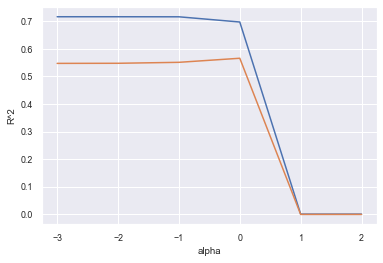

In [50]:
plt.plot(np.log10(alpha_list), train_score2)
plt.plot(np.log10(alpha_list), test_score2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [51]:
lasso =Lasso(alpha=1)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.6979129199926404
0.5662417764576474
